In [1]:
import pandas as pd

In [2]:
dai = pd.read_csv("/content/dai_historical_data.csv")

In [3]:
usdt = pd.read_csv("/content/tether_historical_data.csv")

In [4]:
usdc = pd.read_csv("/content/usd-coin_historical_data.csv")

#PEGGING ANALYSIS IN DAI

In [5]:
dai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        366 non-null    object 
 1   price            366 non-null    float64
 2   market_cap       366 non-null    float64
 3   volume           366 non-null    float64
 4   rolling_mean     360 non-null    float64
 5   price_deviation  360 non-null    float64
 6   price_std        360 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [6]:
dai['price'].describe()

,price
count,366.000000
mean,0.999864
std,0.000661
min,0.997159
25%,0.999560
50%,0.999875
75%,1.000150
max,1.004450


In [7]:
dai['timestamp'] = pd.to_datetime(dai['timestamp'])

<Axes: xlabel='timestamp'>

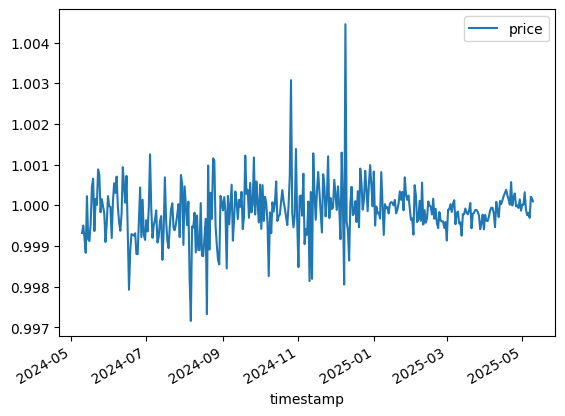

In [8]:
#line plot of price vs timestamp
dai.plot(x='timestamp', y='price', kind='line')

#PEGGING ANALYSIS OF USDT

In [9]:
usdt['timestamp'] = pd.to_datetime(usdt['timestamp'])

In [10]:
usdt['price'].describe()

,price
count,366.000000
mean,0.999875
std,0.000704
min,0.997519
25%,0.999530
50%,0.999915
75%,1.000171
max,1.002466


<Axes: xlabel='timestamp'>

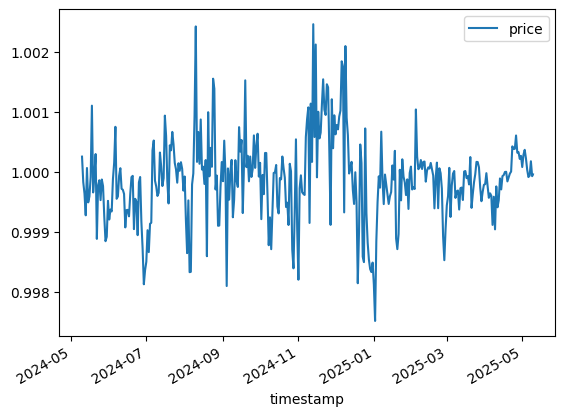

In [11]:
usdt.plot(x='timestamp', y='price', kind='line')

#PEGGING ANALYSIS OF USDC

In [12]:
usdc['timestamp'] = pd.to_datetime(usdc['timestamp'])

In [13]:
usdc['price'].describe()

,price
count,366.000000
mean,0.999962
std,0.000467
min,0.997406
25%,0.999842
50%,0.999949
75%,1.000073
max,1.003413


<Axes: xlabel='timestamp'>

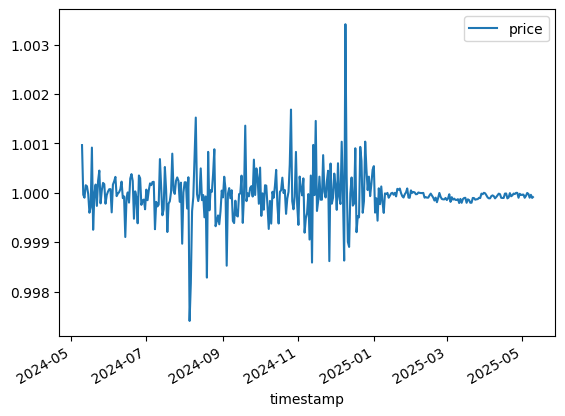

In [14]:
usdc.plot(x='timestamp', y='price', kind = 'line')

Comparing the mean price across the 366 days:                                usdc is affected least by peg

1.  usdc is affected least by peg deviation,
2.   usdt is second on the list

1.   Dai is affected most by peg deviation
                                  


In [25]:
dai['depeg'] = abs(dai['price'] - 1)
usdt['depeg'] = abs(usdt['price'] - 1)
usdc['depeg'] = abs(usdc['price'] - 1)

In [26]:
import pandas as pd

data = {
    'Dataset': ['dai', 'usdt', 'usdc'],
    'Mean': [dai['depeg'].mean(), usdt['depeg'].mean(), usdc['depeg'].mean()],
    'Std Dev': [dai['depeg'].std(), usdt['depeg'].std(), usdc['depeg'].std()],
    'Highest Depeg': [dai['depeg'].max(), usdt['depeg'].max(), usdc['depeg'].max()],
    'Lowest Depeg': [dai['depeg'].min(), usdt['depeg'].min(), usdc['depeg'].min()]
}

summary_table = pd.DataFrame(data)
display(summary_table)

,Dataset,Mean,Std Dev,Highest Depeg,Lowest Depeg
0,dai,0.000462,0.000491,0.004450,8.355825e-08
1,usdt,0.000512,0.000499,0.002481,2.170704e-06
2,usdc,0.000275,0.000379,0.003413,0.000000e+00


#CORRELATION WITH HISTORICAL PAIR PRICES

In [27]:
df_hist = pd.read_csv("/content/merged_historical_data.csv")

In [28]:
df_hist['timestamp'] = pd.to_datetime(df_hist['timestamp'])

In [29]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     3999 non-null   datetime64[ns]
 1   open          3999 non-null   float64       
 2   high          3999 non-null   float64       
 3   low           3999 non-null   float64       
 4   close         3999 non-null   float64       
 5   volume        3999 non-null   float64       
 6   daily_return  3999 non-null   float64       
 7   volatility    3999 non-null   float64       
 8   log_return    3999 non-null   float64       
 9   pair          3999 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 312.6+ KB


In [30]:
# Initial merge (same as before)
merged_df = pd.merge(df_hist, dai, on='timestamp', how='inner', suffixes=('_hist', '_dai'))

# Merge with usdt
merged_df = pd.merge(merged_df, usdt, on='timestamp', how='inner', suffixes=('', '_usdt'))

# Merge with usdc
merged_df = pd.merge(merged_df, usdc, on='timestamp', how='inner', suffixes=('', '_usdc'))

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             1310 non-null   datetime64[ns]
 1   open                  1310 non-null   float64       
 2   high                  1310 non-null   float64       
 3   low                   1310 non-null   float64       
 4   close                 1310 non-null   float64       
 5   volume_hist           1310 non-null   float64       
 6   daily_return          1310 non-null   float64       
 7   volatility            1310 non-null   float64       
 8   log_return            1310 non-null   float64       
 9   pair                  1310 non-null   object        
 10  price                 1310 non-null   float64       
 11  market_cap            1310 non-null   float64       
 12  volume_dai            1310 non-null   float64       
 13  rolling_mean      

In [32]:
merged_df.head()

,timestamp,open,high,low,close,volume_hist,daily_return,volatility,log_return,pair,...,price_deviation_usdt,price_std_usdt,depeg_usdt,price_usdc,market_cap_usdc,volume_usdc,rolling_mean_usdc,price_deviation_usdc,price_std_usdc,depeg_usdc
0,2024-05-10,0.386954,0.332223,0.499793,0.349800,0.006217,-0.043253,0.073530,-0.044216,SOL_USDC,...,NaN,NaN,0.000259,1.000966,3.310097e+10,5.762939e+09,NaN,NaN,NaN,0.000966
1,2024-05-11,0.350039,0.293818,0.493341,0.346147,0.003551,-0.004657,0.031160,-0.004668,SOL_USDC,...,NaN,NaN,0.000166,0.999961,3.310407e+10,6.085825e+09,NaN,NaN,NaN,0.000039
2,2024-05-12,0.346219,0.294437,0.490761,0.335244,0.002748,-0.013348,0.036053,-0.013438,SOL_USDC,...,NaN,NaN,0.000357,0.999901,3.312556e+10,2.915909e+09,NaN,NaN,NaN,0.000099
3,2024-05-13,0.336274,0.308761,0.469149,0.358624,0.006463,0.027791,0.090130,0.027412,SOL_USDC,...,NaN,NaN,0.000720,1.000153,3.313033e+10,2.522959e+09,NaN,NaN,NaN,0.000153
4,2024-05-14,0.358299,0.300338,0.487397,0.327151,0.006328,-0.037494,0.048885,-0.038215,SOL_USDC,...,NaN,NaN,0.000069,1.000133,3.310997e+10,6.013845e+09,NaN,NaN,NaN,0.000133


In [33]:
# Group data by pair
grouped = merged_df.groupby('pair')

# Calculate correlation for each group and store in a dictionary
correlation_dict = {}
for pair, group in grouped:
  correlation_dict[pair] = {
      'DAI Depeg Correlation': group['volume_hist'].corr(group['depeg']),
      'USDT Depeg Correlation': group['volume_hist'].corr(group['depeg_usdt']),
      'USDC Depeg Correlation': group['volume_hist'].corr(group['depeg_usdc'])
  }

# Convert dictionary to a DataFrame for better visualization
correlation_matrix = pd.DataFrame.from_dict(correlation_dict, orient='index')
display(correlation_matrix)

,DAI Depeg Correlation,USDT Depeg Correlation,USDC Depeg Correlation
BNB_USDT,0.167431,0.126020,0.361551
BTC_DAI,0.158960,0.193366,0.380495
BTC_USDC,0.222514,0.109719,0.444271
ETH_DAI,0.127941,0.140850,0.325465
ETH_USDC,0.222056,0.141461,0.473257
ETH_USDT,0.218734,0.149896,0.411213
LTC_USDT,0.185299,0.149861,0.337832
SOL_USDC,-0.178010,-0.130329,-0.177020


BNB/USDC   -0.000072
BNB/USDT   -0.000066
BTC/USDC    0.000090
BTC/USDT    0.000086
ETH/USDC    0.000087
ETH/USDT    0.000091
LTC/USDT    0.000103



